In [1]:
import torch
import os, sys
import numpy as np
module_rootdir = '../../..'
dataset_rootdir = '../../../..'
label_rootdir = module_rootdir
weight_rootdir = module_rootdir
sys.path.append(module_rootdir)

from modules.first_stage.inference import inference_gt_coord_without_nms
from modules.first_stage.set_parameters_for_inference import set_param_for_inference
from modules.first_stage.generate_gt import gen_training_gt
from modules.plot.viz_annotation import vizualize_bbox_resized

In [2]:
weights_file = 'model_weights/1705990924432/anchor_free_detector.pt'

param_dict = set_param_for_inference(
    dataset_type = 'bdd',
    module_rootdir = module_rootdir,
    dataset_rootdir = dataset_rootdir,
    label_rootdir = label_rootdir,
    batch_size = 1,
    trained_weights_file = os.path.join(weight_rootdir, weights_file))

device = param_dict['device']
dataset_param = param_dict['dataset_param']
dataset_train = param_dict['dataset_train']
dataset_val = param_dict['dataset_val'] 
detector = param_dict['detector']

deltas_mean = torch.tensor(dataset_param.deltas_mean, dtype=torch.float32, device=device)
deltas_std = torch.tensor(dataset_param.deltas_std, dtype=torch.float32, device=device)
grid_coord = dataset_param.grid_coord.to(device)

GPU is available. Good to go!
printing model config parameters
----------------------------------------------------------------------------------------------------
backbone                        : efficientnet_b4
num_backbone_nodes              : 4
num_extra_blocks                : 1
num_levels                      : 5
extra_blocks_feat_dim           : 512
num_fpn_blocks                  : 2
fpn_feat_dim                    : 128
prediction head stem_channels   : [128, 128, 128, 128]
activation                      : swish
image dimension BDD (H, W, D)   : (360, 640, 3)
image dimension KITTI (H, W, D) : (263, 873, 3)
num_classes                     : 2
DEVICE                          : cuda
****************************************************************************************************
 
Load JSON file .. please wait
annotations from 69863/69863 aggregated : Aggregation COMPLETE
Load JSON file .. please wait
annotations from 10000/10000 aggregated : Aggregation COMPLETE


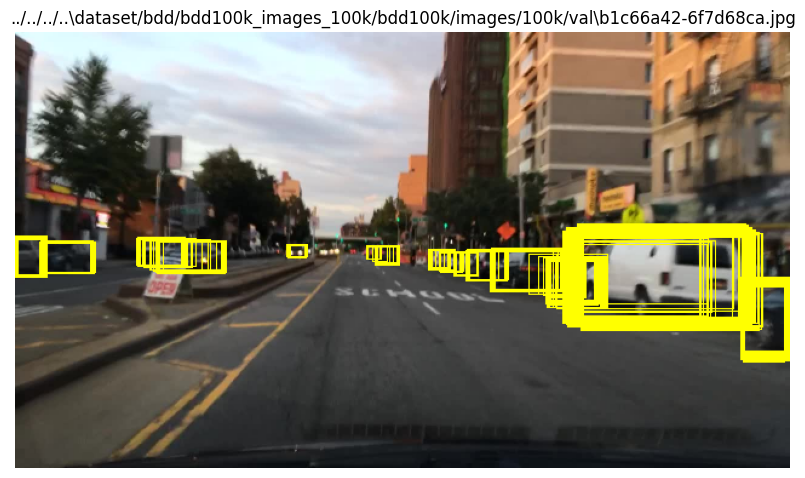

objectness scores in ascending order:
[0.31787083 0.35528183 0.3655159  0.3870012  0.41821432 0.42330697
 0.4244894  0.43233624 0.45023173 0.45046103 0.45571864 0.48951918
 0.4969956  0.5068847  0.5196981  0.5229553  0.5472269  0.5518734
 0.566352   0.5774066  0.58732826 0.5906434  0.5925469  0.59540415
 0.6038801  0.60523206 0.60933363 0.61610156 0.61655146 0.61776286
 0.6190696  0.6200289  0.62528735 0.62748545 0.6275609  0.6290828
 0.6295762  0.6299572  0.6327767  0.63455737 0.63770396 0.6378282
 0.637849   0.6415137  0.64196694 0.6446738  0.65198064 0.6596375
 0.66262674 0.6659837  0.672873   0.67322534 0.67541003 0.67587966
 0.67773664 0.67947    0.6831521  0.68477243 0.68846947 0.69118047
 0.69691676 0.6986703  0.69900686 0.7027692  0.70586    0.70836174
 0.70863575 0.70910114 0.7118986  0.71342546 0.7140991  0.7199438
 0.7205015  0.7233341  0.7247572  0.7249661  0.72938126 0.73062605
 0.73101676 0.73216313 0.7337922  0.7356582  0.73693126 0.73716766
 0.73894906 0.7393891  0.7402

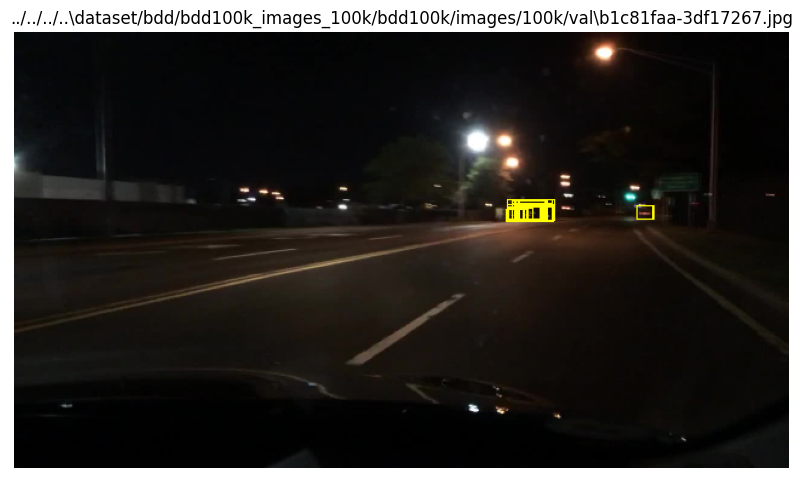

objectness scores in ascending order:
[0.0558693  0.06973596 0.08231871 0.08783592 0.0908578  0.09866764
 0.10168184 0.10364167 0.11179487 0.13059397 0.13433494 0.14197354
 0.14452517 0.14460017 0.17074911 0.17191547 0.17612937 0.17619859
 0.17861345 0.18063338 0.18077402 0.18315677 0.18387368 0.18691206
 0.19103326 0.19407439 0.2090263  0.2123504  0.36707628 0.42781985]
class scores in ascending order:
[0.9833875  0.9859428  0.9916557  0.99336445 0.99438465 0.99496955
 0.99624735 0.9963481  0.9968407  0.99685836 0.9968761  0.9970925
 0.99721473 0.9973355  0.9975533  0.99766386 0.9977514  0.9979007
 0.9979512  0.99798405 0.99802196 0.99810565 0.99821895 0.9982217
 0.998271   0.99836093 0.99846137 0.9985215  0.99916863 0.99945444]


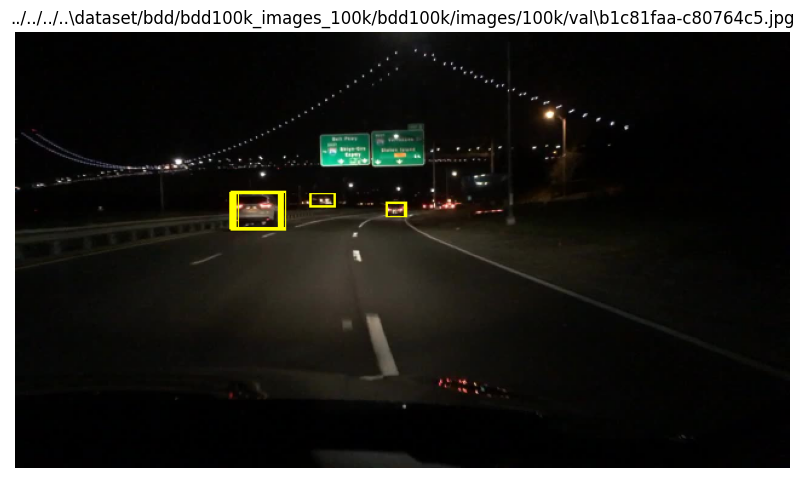

objectness scores in ascending order:
[0.13798213 0.14989911 0.15422358 0.16788764 0.41632783 0.46545774
 0.49556366 0.5216893  0.5234272  0.5279062  0.6714915  0.73078954
 0.7420373  0.75745857 0.7686477  0.76921064 0.7752644  0.7900583
 0.80676633 0.815612   0.8229961  0.8252287  0.82942396 0.8302652
 0.8309061  0.8320036  0.834433   0.8345059  0.8348675  0.83871543
 0.8389858  0.8415503  0.84186417 0.8457664  0.8461249  0.84616625
 0.8461751  0.84819347 0.848881   0.85139513 0.85174274 0.85309505
 0.8541272  0.8558574  0.85607225 0.85830283 0.85985786 0.8634035
 0.86347735 0.8689287  0.8700213  0.8714871  0.871839   0.8721965
 0.873347   0.8737275  0.87413174 0.87505484 0.8782592  0.8797888
 0.881106   0.8844614  0.8859097  0.88801926]
class scores in ascending order:
[0.99694794 0.997398   0.9976191  0.9979259  0.9980584  0.9982583
 0.99845004 0.9988187  0.9989919  0.9990688  0.99920326 0.99921
 0.9992113  0.9992555  0.99928826 0.9992938  0.9993019  0.9993426
 0.9993641  0.99940646

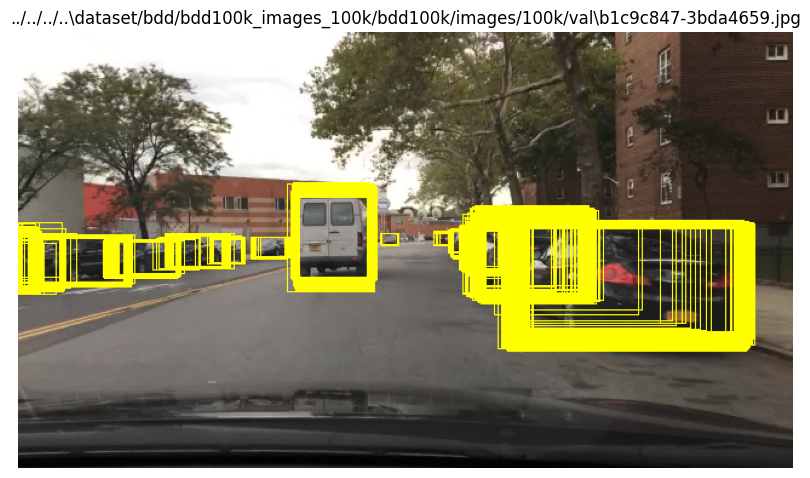

objectness scores in ascending order:
[0.11057681 0.2350487  0.27675956 ... 0.9615359  0.9618447  0.9637534 ]
class scores in ascending order:
[0.98510796 0.9898755  0.99030846 ... 0.9999306  0.9999335  0.99993587]


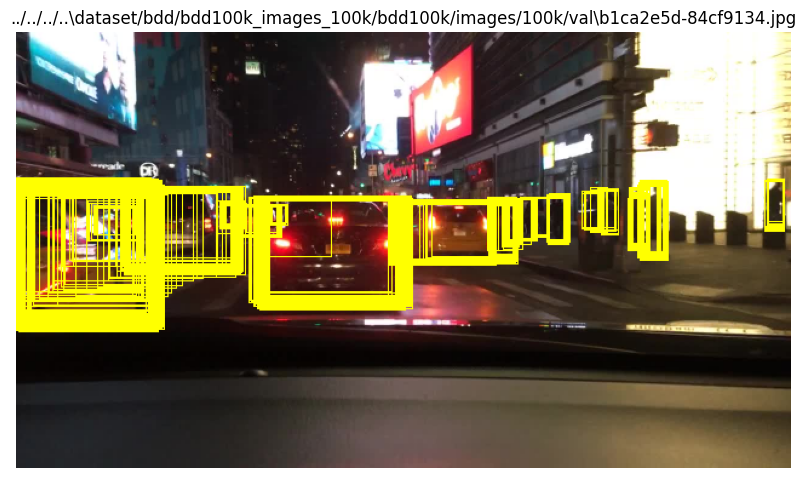

objectness scores in ascending order:
[0.12520774 0.14728823 0.16053578 ... 0.9655614  0.9658739  0.9680472 ]
class scores in ascending order:
[0.9496624  0.95781827 0.9730628  ... 0.9998995  0.99991    0.99993193]


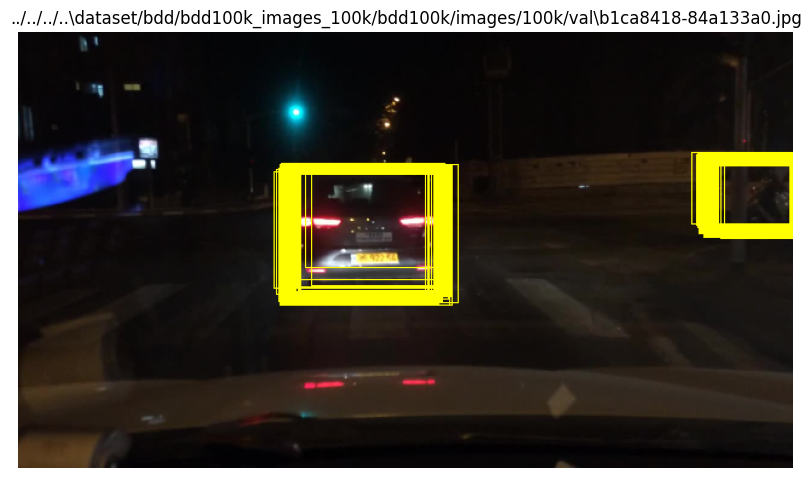

objectness scores in ascending order:
[0.41226256 0.41503933 0.42008826 0.438294   0.43949515 0.4462501
 0.46014655 0.46235588 0.46558484 0.4663569  0.4677135  0.4703089
 0.47538072 0.4828404  0.48462042 0.49724638 0.504723   0.52446187
 0.5404734  0.541617   0.54645604 0.5469243  0.54819655 0.5561338
 0.5612725  0.5631092  0.5686049  0.5691736  0.5707724  0.5758935
 0.5769272  0.57904166 0.57975763 0.5797832  0.58010626 0.58484995
 0.58834124 0.589243   0.5900977  0.59353054 0.59603375 0.5973679
 0.5974809  0.59771144 0.5993977  0.60168827 0.6045947  0.60805064
 0.6089266  0.6094285  0.6098001  0.6106762  0.611606   0.611845
 0.6121711  0.6122958  0.6170065  0.61755913 0.6183384  0.61871433
 0.62096953 0.6215384  0.6253196  0.62873346 0.62886655 0.6298121
 0.63019544 0.6306436  0.6307506  0.6309475  0.6316033  0.63577753
 0.6358932  0.6371067  0.6382512  0.63943243 0.64055353 0.6413563
 0.64155406 0.64274883 0.64337623 0.6440343  0.64405316 0.6443603
 0.6445825  0.6447352  0.64473665 

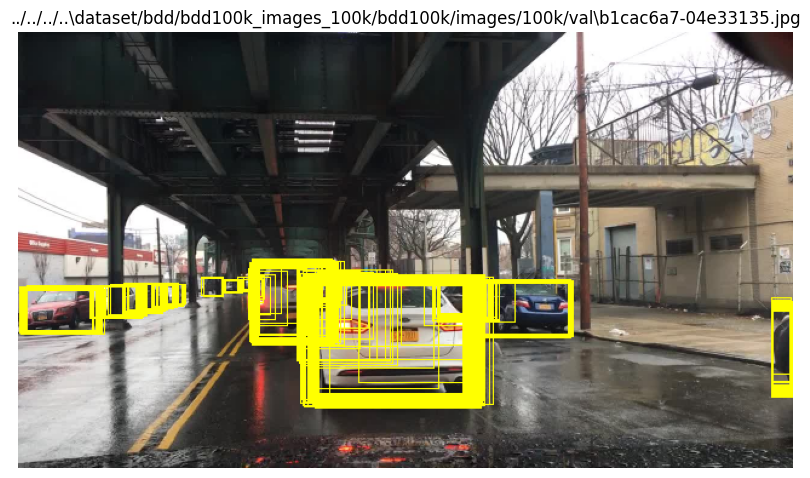

objectness scores in ascending order:
[0.16141747 0.18817918 0.19596669 ... 0.94130987 0.94640195 0.95505095]
class scores in ascending order:
[0.9131411  0.9185194  0.93478143 ... 0.9999124  0.9999149  0.9999163 ]


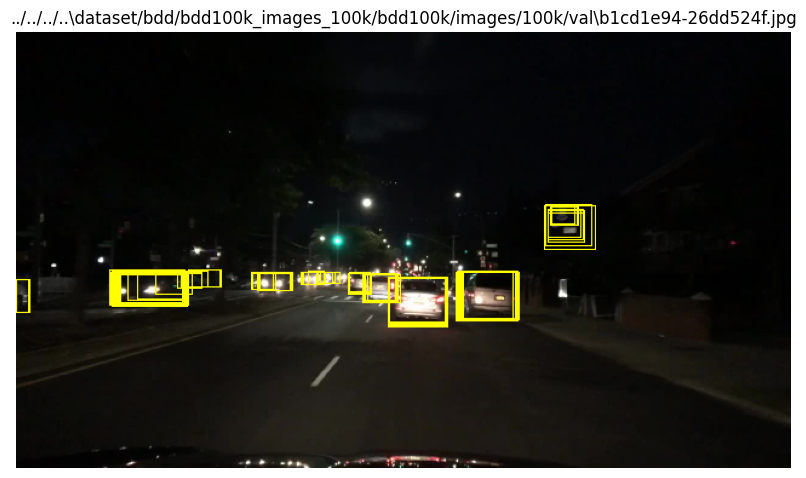

objectness scores in ascending order:
[0.01322844 0.01507567 0.0153117  0.01659448 0.02050661 0.02154674
 0.02585442 0.0273249  0.02901165 0.33032483 0.33414418 0.34667277
 0.35427502 0.36411852 0.38606817 0.3902137  0.39935264 0.41418058
 0.41876882 0.43101603 0.44538286 0.45885104 0.46077183 0.46188828
 0.46265638 0.46620846 0.46825832 0.49043265 0.49060398 0.4999404
 0.5037153  0.5170899  0.51795554 0.5202882  0.5596505  0.56065255
 0.6137072  0.62185144 0.62706673 0.6324664  0.63845676 0.65498644
 0.6571491  0.67303497 0.69128644 0.6934114  0.6935206  0.69685453
 0.6981592  0.7007236  0.70466137 0.70476717 0.70531523 0.70589125
 0.7081279  0.70845604 0.7124654  0.71668506 0.7214077  0.73205215
 0.73931324 0.73959565 0.7502408  0.7524659  0.75469375 0.7548052
 0.7801119  0.78525263 0.79261476 0.793212   0.80418265 0.80450696
 0.8051547  0.8056657  0.8057448  0.80668354 0.80779546 0.8079488
 0.81195086 0.8134646  0.81359255 0.8187024  0.8191162  0.81929547
 0.82100314 0.822781   0.82

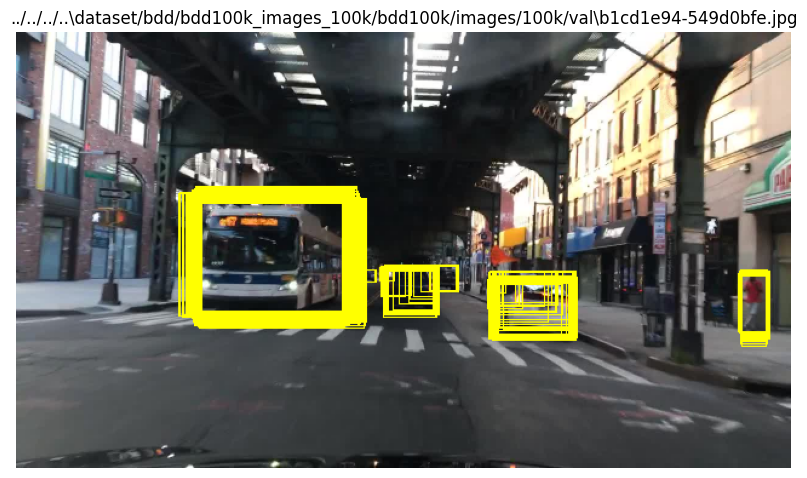

objectness scores in ascending order:
[0.3082496  0.3095741  0.33572462 0.3434026  0.3505144  0.3851728
 0.39908612 0.528323   0.5621621  0.5740574  0.57498443 0.5810126
 0.5828405  0.58693916 0.6095771  0.6198181  0.62719774 0.6337278
 0.64590675 0.6506066  0.6606215  0.66114634 0.66349167 0.6643946
 0.66491574 0.66533047 0.6654333  0.66696984 0.6735648  0.6773694
 0.6859687  0.6869018  0.69242877 0.6945952  0.6950326  0.705679
 0.7100108  0.7118653  0.7145363  0.71822524 0.72372746 0.7262235
 0.7268816  0.72757727 0.7382799  0.7391055  0.7402993  0.74117565
 0.74303013 0.7476641  0.750051   0.7508683  0.7521934  0.75664365
 0.75699997 0.76582706 0.7658275  0.76683384 0.7699381  0.77164966
 0.776144   0.77638495 0.7783749  0.77846396 0.780997   0.78280944
 0.7849179  0.7869993  0.7890406  0.7911984  0.7926073  0.79329896
 0.7934534  0.79360116 0.7945104  0.79652345 0.79673654 0.7969936
 0.79818165 0.79902774 0.80067325 0.8014126  0.8014966  0.80261546
 0.80286723 0.8029206  0.80328375

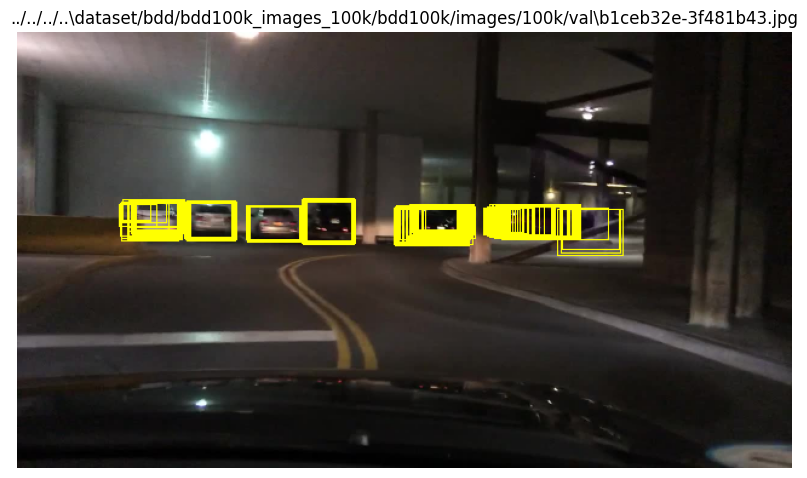

objectness scores in ascending order:
[0.21360433 0.23693632 0.24264358 0.25290945 0.26583925 0.27376986
 0.30734456 0.3165186  0.34920847 0.3526455  0.35347742 0.36212862
 0.4042509  0.42626002 0.44279277 0.44376242 0.4474749  0.47239515
 0.48892686 0.48924458 0.4917672  0.49743226 0.50656813 0.5107022
 0.5172366  0.5176765  0.5241364  0.5271879  0.52881163 0.5315193
 0.5329068  0.5379884  0.5407504  0.541067   0.5423755  0.54275215
 0.5470923  0.55004674 0.5517419  0.5518556  0.5528579  0.5547026
 0.55630493 0.55637455 0.56463873 0.5712546  0.58200836 0.58245015
 0.5826095  0.58656836 0.5888494  0.59596103 0.59754676 0.6005927
 0.60452867 0.607335   0.60903716 0.6110443  0.613913   0.61603636
 0.61639756 0.6169558  0.6206318  0.6256444  0.6263987  0.62760836
 0.6290211  0.63819325 0.6393951  0.6412955  0.6432126  0.6441245
 0.64453775 0.6446104  0.6522879  0.65787226 0.66072714 0.6621458
 0.6624153  0.6628227  0.6636838  0.6649035  0.6669144  0.6671969
 0.66740954 0.6676901  0.668479

In [3]:
# dataset = dataset_train
dataset = dataset_val
iter_start_offset = 0
max_iters = iter_start_offset + 10

for iter in range(iter_start_offset, max_iters):

    img, labels = dataset.__getitem__(iter)
    img_path = labels['img_path']
    img = img.unsqueeze(0).to(device)
    bboxes = [labels['bbox'].to(device)]
    clslabels = [labels['obj_class_label'].to(device)]

    groundtruths = gen_training_gt(
        bboxes, 
        clslabels, 
        dataset_param.STRIDE_W,
        dataset_param.STRIDE_H,
        grid_coord,
        deltas_mean,
        deltas_std,
        device,
        dataset_param.ignored_classId)

    pred = inference_gt_coord_without_nms(
        detector, img, 
        grid_coord,
        deltas_mean, deltas_std,
        groundtruths.objness_logits[0])
    
    obj_score = pred['pred_score'].cpu().numpy()
    pred_boxes = pred['pred_boxes'].cpu().numpy()
    pred_boxes_center = pred['pred_boxes_center'].cpu().numpy()
    cls_score = pred['cls_score'].cpu().numpy()
    cls_idx = pred['cls_idx'].cpu().numpy()

    vizualize_bbox_resized(img_path, pred_boxes, dataset_param.IMG_RESIZED_W, dataset_param.IMG_RESIZED_H, figsize=(10,8))
    print('objectness scores in ascending order:')
    print(np.sort(obj_score))
    print('class scores in ascending order:')
    print(np.sort(cls_score))
    print('=' * 100)